In [1]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from collections import Counter
from heapq import nlargest

# Basic NLP

## Data cleaning

In [11]:
import re

# sample review from the IMDB dataset.
review = "<b>A touching movie!!</b> It is full of emotions and wonderful acting.<br> I could have sat through it a second time."

cleaned_review = re.sub(re.compile('<.*?>'), '', review) # remove HTML tags
cleaned_review = re.sub('[^A-Za-z0-9]+', ' ', cleaned_review) # keep only alphanumeric characters
cleaned_review = cleaned_review.lower() # lower case

print(cleaned_review)

a touching movie it is full of emotions and wonderful acting i could have sat through it a second time 


In [18]:
# Tokenization

import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt') # download "Punkt Sentence Tokenizer". it's the default ML model used by the `word_tokenizer` class

tokens = nltk.word_tokenize(cleaned_review)

print(cleaned_review)
print(tokens)

a touching movie it is full of emotions and wonderful acting i could have sat through it a second time 
['a', 'touching', 'movie', 'it', 'is', 'full', 'of', 'emotions', 'and', 'wonderful', 'acting', 'i', 'could', 'have', 'sat', 'through', 'it', 'a', 'second', 'time']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\matte\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
# Stop words removal
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = stopwords.words('english')

filtered_review = [word for word in tokens if word not in stop_words] # removing stop words

print(filtered_review)

['touching', 'movie', 'full', 'emotions', 'wonderful', 'acting', 'could', 'sat', 'second', 'time']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matte\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

lemm_review = [lemmatizer.lemmatize(word) for word in filtered_review]

print(lemm_review)

['touching', 'movie', 'full', 'emotion', 'wonderful', 'acting', 'could', 'sat', 'second', 'time']


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\matte\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\matte\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [23]:
from nltk import word_tokenize, pos_tag

nltk.download('averaged_perceptron_tagger')

text = "I am learning Natural Language Processing on Analytics Vidhya"
tokens = word_tokenize(text)
print(pos_tag(tokens))

[('I', 'PRP'), ('am', 'VBP'), ('learning', 'VBG'), ('Natural', 'NNP'), ('Language', 'NNP'), ('Processing', 'NNP'), ('on', 'IN'), ('Analytics', 'NNP'), ('Vidhya', 'NNP')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\matte\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Spacy

In [27]:
import os
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

print(nlp.pipe_names)
print()

for step in nlp.pipeline:
    print(step)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec object at 0x0000026A78C7E210>)
('tagger', <spacy.pipeline.tagger.Tagger object at 0x0000026A78C7E3F0>)
('parser', <spacy.pipeline.dep_parser.DependencyParser object at 0x0000026A704CE810>)
('attribute_ruler', <spacy.pipeline.attributeruler.AttributeRuler object at 0x0000026A79D3FB10>)
('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer object at 0x0000026A78EA9210>)
('ner', <spacy.pipeline.ner.EntityRecognizer object at 0x0000026A704CEC00>)


In [28]:
import pandas as pd
pd.set_option('display.max_colwidth', None) # turn off column width truncation

ner_labels = nlp.pipeline[-1][1].labels
ner_label_df = (
    pd.DataFrame([(label, spacy.explain(label)) for label in ner_labels], columns=["label", "explanation"])
    .style
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'left')]}])
    .set_properties(**{'text-align': 'left'})
)   

display(ner_label_df)

,label,explanation
0,CARDINAL,Numerals that do not fall under another type
1,DATE,Absolute or relative dates or periods
2,EVENT,"Named hurricanes, battles, wars, sports events, etc."
3,FAC,"Buildings, airports, highways, bridges, etc."
4,GPE,"Countries, cities, states"
5,LANGUAGE,Any named language
6,LAW,Named documents made into laws.
7,LOC,"Non-GPE locations, mountain ranges, bodies of water"
8,MONEY,"Monetary values, including unit"
9,NORP,Nationalities or religious or political groups


In [29]:
text = """
Looking for a hotel in New York near Times Square with free breakfast and cheaper
than $100 for 2nd June which is really kids friendly and has a swimming pool and I want to stay there for 8 days
""".strip()

doc = nlp(text)
# sentence_spans = list(doc.sents)
displacy.render(doc, jupyter=True, style="ent")

pd.DataFrame([(label, spacy.explain(label)) for label in ner_labels], columns=["label", "explanation"])

In [53]:
text = """Close to the Effiel Tower and is very high end with great shopping nearby"""
doc = nlp(text)
# sentence_spans = list(doc.sents)
displacy.render(doc, jupyter=True, style="ent")

In [54]:
#text = """My very photogenic mother died in a freak accident (picnic, lightning) when I was three, and, save for a pocket of warmth in the darkest past, nothing of her subsists within the hollows and dells of memory, over which, if you can still stand my style (I am writing under observation), the sun of my infancy had set: surely, you all know those redolent remnants of day suspended, with the midges, about some hedge in bloom or suddenly entered and traversed by the rambler, at the bottom of a hill, in the summer dusk; a furry warmth, golden midges"""
text = "I want to stay in a European city that filmed Game of Thrones and has very cheap booze and art galleries for 4 days"
doc = nlp(text)
# sentence_spans = list(doc.sents)
displacy.render(doc, jupyter=True, style="ent")

In [69]:
from spacy import displacy

text = ("Natural Language Processing provides computers the capability of understanding text")
doc = nlp(text)
displacy.render(doc, jupyter=True, style='dep')

pd.DataFrame(
    [(token.text, token.dep_, spacy.explain(token.dep_), token.pos_, spacy.explain(token.pos_)) for token in doc],
    columns=["token", "dependency_label", "dep_label_expl", "pos_label" , "pos_label_expl"]
).T

,0,1,2,3,4,5,6,7,8,9
token,Natural,Language,Processing,provides,computers,the,capability,of,understanding,text
dependency_label,compound,compound,nsubj,ROOT,dobj,det,dobj,prep,pcomp,dobj
dep_label_expl,compound,compound,nominal subject,root,direct object,determiner,direct object,prepositional modifier,complement of preposition,direct object
pos_label,PROPN,PROPN,PROPN,VERB,NOUN,DET,NOUN,ADP,VERB,NOUN
pos_label_expl,proper noun,proper noun,proper noun,verb,noun,determiner,noun,adposition,verb,noun


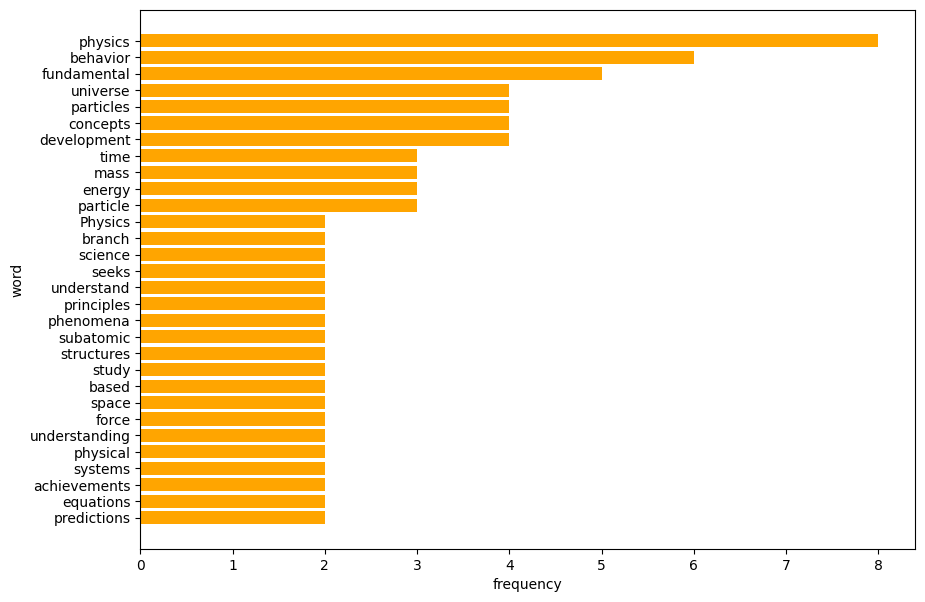

In [72]:
from collections import Counter
import matplotlib.pyplot as plt

text = '''
Physics is a fundamental branch of science that seeks to understand the fundamental principles that govern the behavior of the universe. It encompasses a broad range of phenomena, from the smallest subatomic particles to the largest structures in the universe, such as galaxies and black holes.
The study of physics is based on a few fundamental concepts, such as space, time, mass, energy, and force. These concepts provide a framework for understanding the behavior of physical systems and the interactions between them.
One of the key achievements of physics is the development of a set of mathematical equations that describe the behavior of physical systems. These equations allow physicists to make predictions about the behavior of a system and test those predictions through experimentation.
One of the most important concepts in physics is the theory of relativity, which was developed by Albert Einstein in the early 20th century. The theory of relativity explains how the laws of physics are the same for all observers in all inertial frames of reference, regardless of their relative motion. It also explains the nature of gravity as a curvature of spacetime caused by the presence of mass and energy.
Another important area of physics is quantum mechanics, which deals with the behavior of particles on a very small scale, such as atoms and subatomic particles. Quantum mechanics is based on the idea that particles can exist in multiple states at the same time, and that the act of measurement can cause a particle to collapse into a single state. This leads to some strange and counterintuitive phenomena, such as entanglement, where the properties of one particle can affect the properties of another particle instantaneously over vast distances.
Physics has many practical applications in areas such as engineering, technology, and medicine. For example, the principles of physics are used in the design of bridges, buildings, and other structures, as well as in the development of new technologies such as semiconductors and lasers. In medicine, physics is used in the development of imaging technologies such as X-rays, MRI, and CT scans, as well as in the development of radiation therapy for cancer treatment.
In conclusion, physics is a fundamental branch of science that seeks to understand the behavior of the universe through the study of fundamental concepts such as space, time, mass, energy, and force. Its achievements have led to a deeper understanding of the universe and have practical applications that benefit society in many ways.
'''.strip()

doc = nlp(text)
words = [token.text for token in doc if not token.is_punct and not token.is_stop and not token.is_space]
word_freq = Counter(words)
common_words = word_freq.most_common(30)

words = [pair[0] for pair in common_words][::-1]
freqs = [pair[1] for pair in common_words][::-1]

plt.figure(dpi=100, figsize=(10, 7))
plt.barh(words, freqs,  color='orange')
plt.xlabel("frequency")
plt.ylabel("word")
plt.show()

In [73]:
# Create the nlp object
from spacy.language import Language

nlp = spacy.load("en_core_web_sm")


# Define a custom component
@Language.component("doc_len")
def doc_len_fn(doc):
    print("Your Doc length:", len(doc))
    return doc

# Add the component first in the pipeline
nlp.add_pipe("doc_len", first=True)

# Print the pipeline component names
print("Pipeline:", nlp.pipe_names)

Pipeline: ['doc_len', 'tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [74]:
text = ("Natural Language Processing provides computers the capability of understanding text")
doc = nlp(text)

Your Doc length: 10


In [76]:
from string import punctuation

# stopwords = list(STOP_WORDS)
punctuation = punctuation + "\n"
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~



In [129]:
# Load a larger pipeline with vectors
nlp = spacy.load("en_core_web_md")


# Compare two documents
doc1 = nlp("I like fast food")
doc2 = nlp("I like pizza")
print(doc1.similarity(doc2))

0.8698332283318978
